# 1. Import Libraries
## Start by importing the necessary Python libraries:

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset
## Assuming you've downloaded the dataset and placed it in your working directory:

In [4]:
df = pd.read_csv('Heart_Attack_Risk_Levels_Dataset.csv')

# 3. Explore the Data
## Understand the structure and contents of the dataset

In [5]:
df.head()          # View the first few rows

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor


In [6]:
df.info()          # Get a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
 9   Risk_Level                1319 non-null   object 
 10  Recommendation            1319 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 113.5+ KB


In [7]:
df.describe()      # Statistical summary

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [8]:
df.isnull().sum()  # Check for missing values

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
Risk_Level                  0
Recommendation              0
dtype: int64

## ✅ Show Skewness in a Table Format

In [9]:
#🔹 Step 1: Calculate Skewness
skew_df = df.skew(numeric_only=True).to_frame(name='Skewness')

In [10]:
#🔹 Step 2: Add Mean and Median
skew_df['Mean'] = df.mean(numeric_only=True)
skew_df['Median'] = df.median(numeric_only=True)

In [11]:
#🔹 Step 3: Add Interpretation (optional, manual)
#You can add basic interpretation logic like this:

def interpret_skew(val):
    if val > 1:
        return 'Highly right-skewed'
    elif val > 0.5:
        return 'Moderately right-skewed'
    elif val > -0.5:
        return 'Symmetrical'
    elif val > -1:
        return 'Moderately left-skewed'
    else:
        return 'Highly left-skewed'

skew_df['Interpretation'] = skew_df['Skewness'].apply(interpret_skew)

In [12]:
#🔹 Step 4: Rearranged Output
# Now you can display the table like this:
display(skew_df[['Mean', 'Median', 'Skewness', 'Interpretation']])

,Mean,Median,Skewness,Interpretation
Age,56.193328,58.000,-0.238356,Symmetrical
Gender,0.659591,1.000,-0.674363,Moderately left-skewed
Heart rate,78.336619,74.000,18.247720,Highly right-skewed
Systolic blood pressure,127.170584,124.000,0.685246,Moderately right-skewed
Diastolic blood pressure,72.269143,72.000,0.489202,Symmetrical
Blood sugar,146.634344,116.000,1.933475,Highly right-skewed
CK-MB,15.274306,2.850,4.978095,Highly right-skewed
Troponin,0.360942,0.014,5.799107,Highly right-skewed


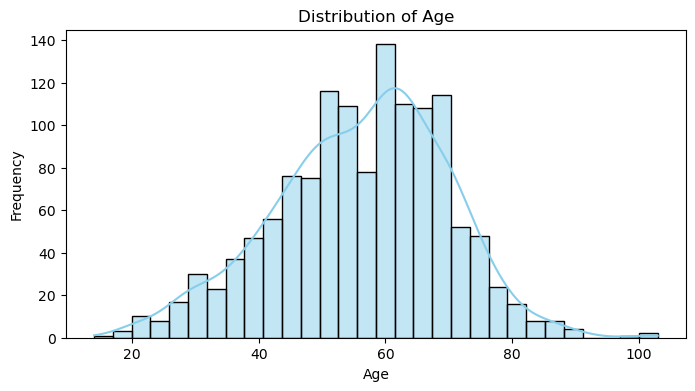

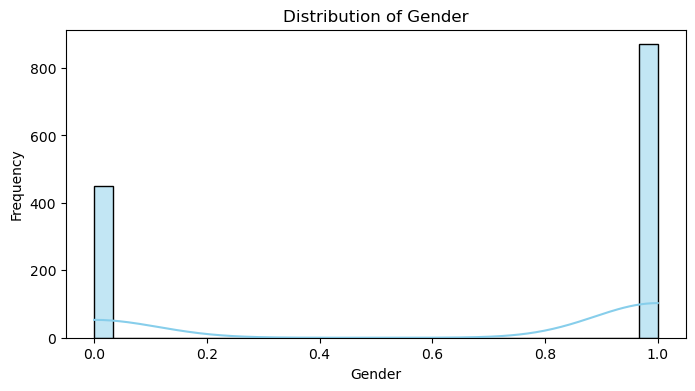

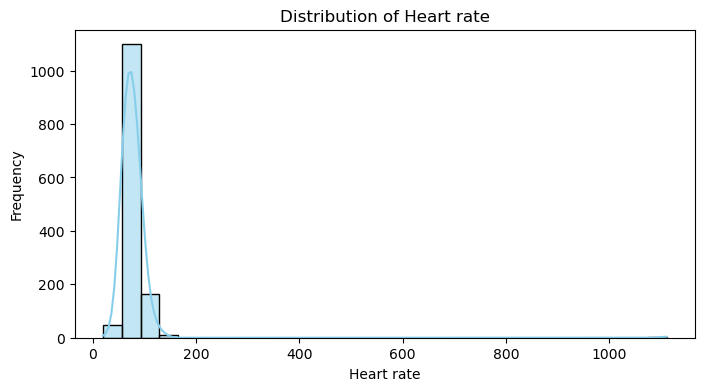

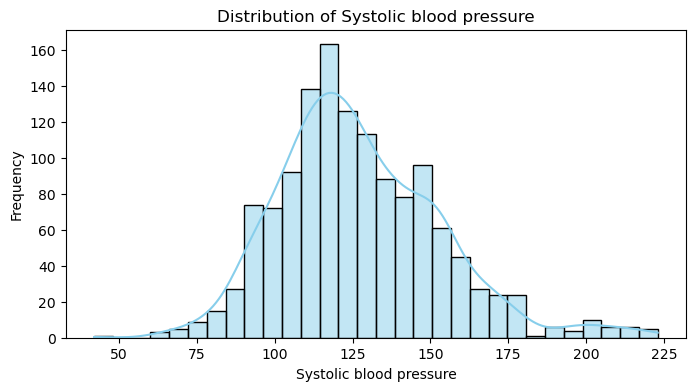

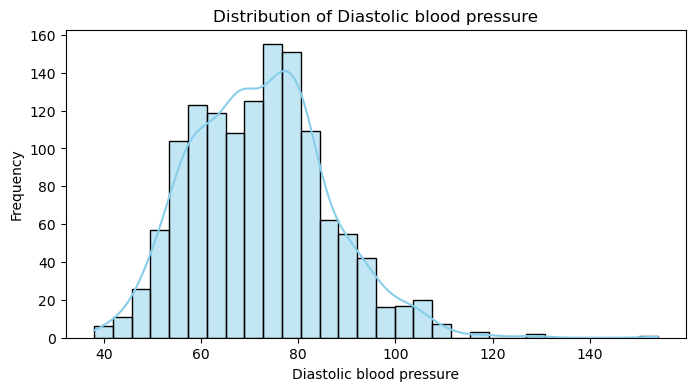

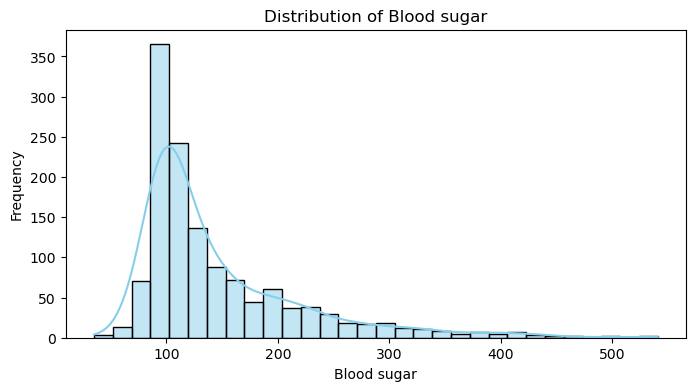

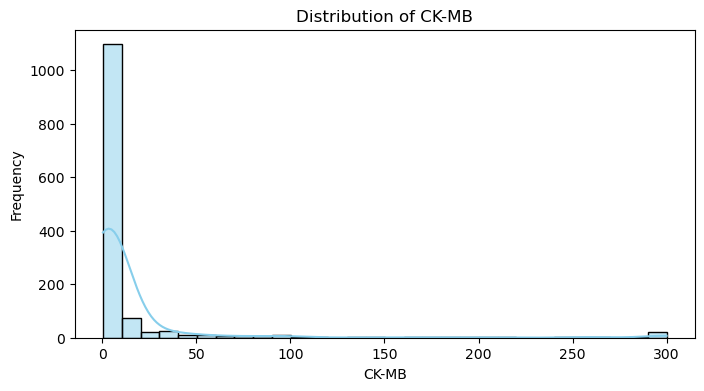

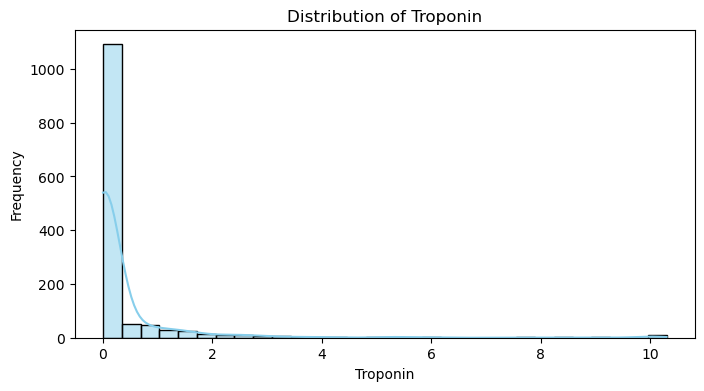

In [13]:
# 4. Visualize distributions
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Risk_Level_Num              1.000000
Troponin                    0.224347
Age                         0.219883
CK-MB                       0.200261
Systolic blood pressure     0.117989
Gender                      0.108060
Blood sugar                 0.086475
Diastolic blood pressure    0.076761
Heart rate                  0.015049
Name: Risk_Level_Num, dtype: float64


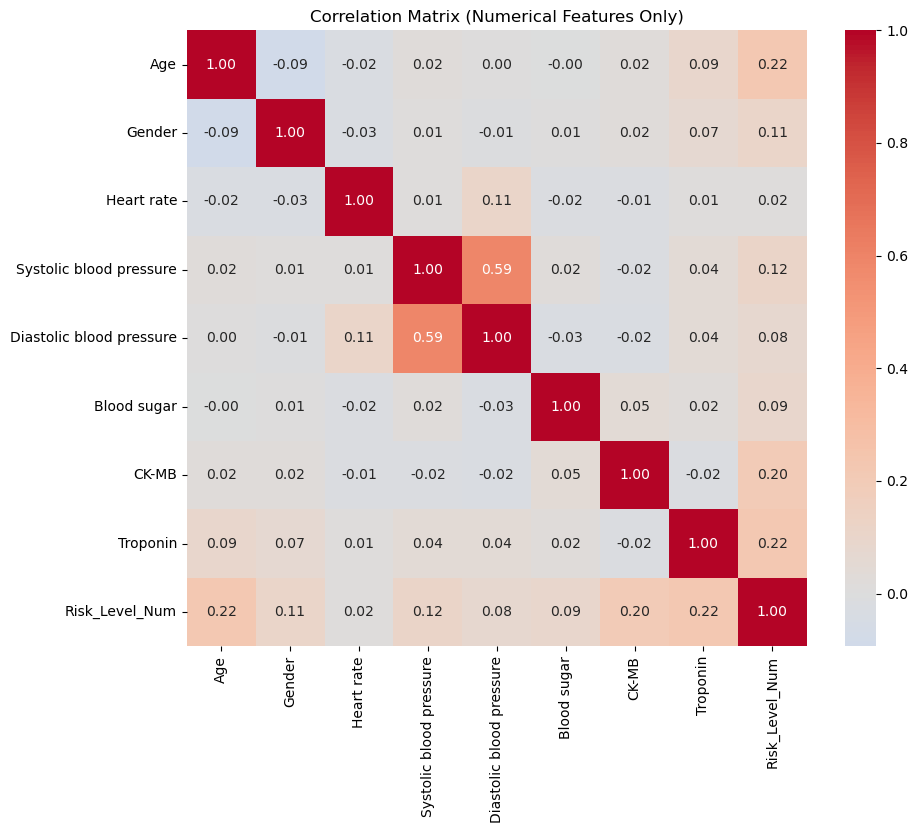

'\nWhat is Correlation?\nCorrelation measures the linear relationship between two variables.\n\nValues range from -1 to +1:\n\n+1: Perfect positive correlation (when one increases, the other increases)\n\n-1: Perfect negative correlation (when one increases, the other decreases)\n\n0: No linear correlation\n'

In [23]:
# 5. Corr heatmap
risk_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Risk_Level_Num'] = df['Risk_Level'].map(risk_mapping)
corr_with_risk = df.select_dtypes(include='number').corr()['Risk_Level_Num'].sort_values(ascending=False)
print(corr_with_risk)
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

'''
What is Correlation?
Correlation measures the linear relationship between two variables.

Values range from -1 to +1:

+1: Perfect positive correlation (when one increases, the other increases)

-1: Perfect negative correlation (when one increases, the other decreases)

0: No linear correlation
'''

✅ Goal
To test:

Does the distribution of a numeric variable (e.g., Troponin, Age, etc.) differ significantly across the three Risk_Level groups?

In [29]:
'''
🔬 Step 3B: Kruskal-Wallis Test (non-parametric)
Use if data isn't normally distributed or variances differ:
'''

from scipy.stats import kruskal

numeric_cols = df.select_dtypes(include='number').columns.drop('Risk_Level_Num')

print("Kruskal-Wallis Test Results:\n")
for col in numeric_cols:
    groups = [df[df['Risk_Level'] == level][col] for level in df['Risk_Level'].unique()]
    stat, p = kruskal(*groups)
    print(f"{col}: H = {stat:.4f}, p = {p:.4f} {'(Significant)' if p < 0.05 else ''}")


Kruskal-Wallis Test Results:

Age: H = 74.2397, p = 0.0000 (Significant)
Gender: H = 15.4825, p = 0.0004 (Significant)
Heart rate: H = 0.1774, p = 0.9151 
Systolic blood pressure: H = 181.8995, p = 0.0000 (Significant)
Diastolic blood pressure: H = 65.5749, p = 0.0000 (Significant)
Blood sugar: H = 90.0288, p = 0.0000 (Significant)
CK-MB: H = 118.1653, p = 0.0000 (Significant)
Troponin: H = 591.3447, p = 0.0000 (Significant)


In [28]:
'''
🔬 Step 3A: ANOVA Test (parametric)
Use if your data is normally distributed and variances are similar:
'''

from scipy.stats import f_oneway

# List of all numeric columns except the encoded Risk_Level
numeric_cols = df.select_dtypes(include='number').columns.drop('Risk_Level_Num')

print("ANOVA Test Results:\n")
for col in numeric_cols:
    groups = [df[df['Risk_Level'] == level][col] for level in df['Risk_Level'].unique()]
    stat, p = f_oneway(*groups)
    print(f"{col}: F = {stat:.4f}, p = {p:.4f} {'(Significant)' if p < 0.05 else ''}")


ANOVA Test Results:

Age: F = 40.0121, p = 0.0000 (Significant)
Gender: F = 7.8214, p = 0.0004 (Significant)
Heart rate: F = 0.4168, p = 0.6593 
Systolic blood pressure: F = 106.1142, p = 0.0000 (Significant)
Diastolic blood pressure: F = 37.5516, p = 0.0000 (Significant)
Blood sugar: F = 70.1663, p = 0.0000 (Significant)
CK-MB: F = 32.4841, p = 0.0000 (Significant)
Troponin: F = 41.1661, p = 0.0000 (Significant)


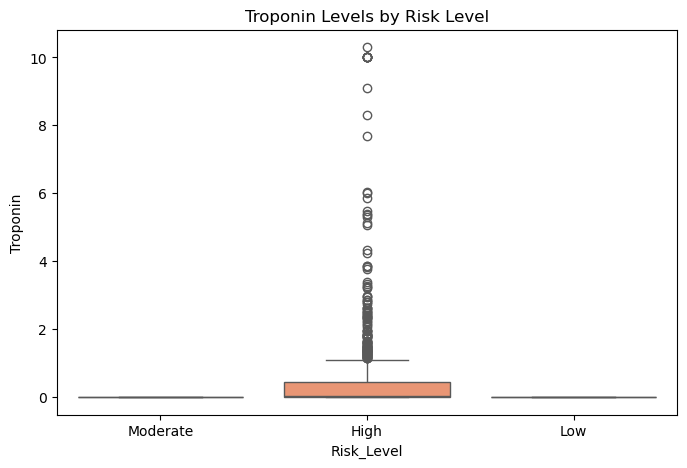

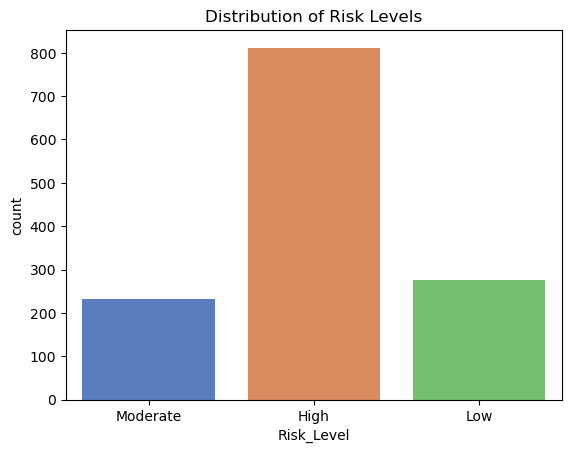

In [32]:
# Boxplots for Distribution Insight
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk_Level', y='Troponin', data=df, palette='Set2', hue='Risk_Level', dodge=False, legend=False)
plt.title('Troponin Levels by Risk Level')
plt.show()

'''

📍 Explanation of the Plot:
You're visualizing Troponin levels grouped by Risk Level (Low, Moderate, High), and the boxplot shows:

Box (interquartile range) → 25th to 75th percentile

Line inside box → median (50th percentile)

“Whiskers” → extend up to 1.5 × IQR (interquartile range)

Circles (the points you're asking about) → outliers (values above the whisker range)

🧠 Why are there outliers?
In medical datasets like this, Troponin can spike sharply during a heart attack, which is why the High risk group shows:

Box at lower Troponin levels

Many dots above = patients with very elevated Troponin levels

This is expected and clinically relevant — high Troponin is a strong indicator of cardiac damage.


🧪 Should you remove them?
That depends on your goal:

Goal	Action
Understand clinical patterns	Keep them – they’re real and meaningful
Train a machine learning model	Consider treating them carefully (e.g., log-transform, robust scaler)
'''



# 3. Countplot for Category Distribution
sns.countplot(x='Risk_Level', data=df, palette='muted', hue='Risk_Level', dodge=False, legend=False)
plt.title('Distribution of Risk Levels')
plt.show()


# 4. Visualize the Data
## Use visualization to gain insights:

In [ ]:
# Distribution of Age
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

In [ ]:
# Heart Rate vs. Risk Level

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Heart rate vs. Risk level
sns.boxplot(x='Risk_Level', y='Heart rate', data=df)
plt.title('Heart Rate by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#This will generate the correct boxplot visualizing how heart rate varies across different heart attack risk levels.

In [ ]:
# Correlation Heatmap (Numeric Features Only)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])  # Exclude non-numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

#This will give you a clear visualization of how numeric features like Troponin, CK-MB, Heart rate, etc., are related to one another.

In [ ]:
#1. Troponin vs. Risk_Level
sns.boxplot(x='Risk_Level', y='Troponin', data=df)
plt.title('Troponin Level by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Troponin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Blood sugar vs. Risk_Level
sns.boxplot(x='Risk_Level', y='Blood sugar', data=df)
plt.title('Blood Sugar Level by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar (mg/dL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#3. CK-MB vs. Risk_Level
sns.boxplot(x='Risk_Level', y='CK-MB', data=df)
plt.title('CK-MB Enzyme Level by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('CK-MB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis Documentation 

---

# 💓 Heart Attack Risk Assessment

## 🧠 Overview
This project provides a step-by-step data analysis and machine learning workflow to assess heart attack risk using patient health data. The notebook guides you through the entire data analysis pipeline — from loading and cleaning data to visualizing patterns and building predictive models.

---

## 📊 Dataset
The dataset used is available on Kaggle:  
[[Dataset](https://raw.githubusercontent.com/Christine-97/Data_analysis_with_jupyter/main/Heart_Attack_Risk_Levels_Dataset.csv)](https://raw.githubusercontent.com/Christine-97/Data_analysis_with_jupyter/main/Heart_Attack_Risk_Levels_Dataset.csv)
https://raw.githubusercontent.com/Christine-97/Data_analysis_with_jupyter/main/Heart_Attack_Risk_Levels_Dataset.csvsment-dataset)

It includes features such as:
- Age, Gender  
- Heart rate, Blood Pressure (Systolic and Diastolic)  
- Blood sugar, CK-MB, Troponin  
- Result, Risk Level, and Recommendation

---

## ⚙️ Installation
Required libraries include:
1. pandas
2. numpy
3. matplotlib
4. seaborn
5. scikit-learn

---

## 📝 Usage
To run the analysis:
* Launch Jupyter Notebook:
    jupyter notebook

* Run cells step-by-step to explore:
1. Data cleaning
2. Visualization

---

## 📈 Results

Correlation heatmap shows relationships between clinical indicators and heart attack risk.
Box plots highlight differences in heart rate, blood pressure, and troponin levels by risk category.
A classification model (e.g., Decision Tree or Random Forest) was trained to predict Risk_Level with promising accuracy.

---